In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('noddy.csv')
x = dataset['Administration']
y = dataset['Profit']
m = len(x)

In [3]:
dataset.describe()

,Administration,Profit
count,50.000000,50.000000
mean,121344.639600,112012.639200
std,28017.802755,40306.180338
min,51283.140000,14681.400000
25%,103730.875000,90138.902500
50%,122699.795000,107978.190000
75%,144842.180000,139765.977500
max,182645.560000,192261.830000


In [4]:
dataset.shape()

TypeError: 'tuple' object is not callable

In [5]:
dataset.head()

,Administration,Profit
0,136897.80,192261.83
1,151377.59,191792.06
2,101145.55,191050.39
3,118671.85,182901.99
4,91391.77,166187.94


In [6]:
#Hypothesis 
def hypo(x,a0,a1):
    hypo = a0 + a1*x   #y=mx+c
    return hypo

#Cost Function(J)   J = 1/2*m((hypo(x[i],a0,a1)-y[i])**2)
def J(a0,a1,x,y,m):
    j = 0
    
    for i in range(m):
        j += (hypo(x[i],a0,a1) - y[i])**2

    return j/(2*m)

#Gradient Descent function
def gradient(a0,a1,x,y,m):
    Dja0 = 0
    Dja1 = 1
    
    for i in range(m):
        Dja0 += (hypo(x[i],a0,a1) - y[i])
        Dja1 += (hypo(x[i],a0,a1) - y[i])*x[i]
        
    grad = [Dja0/m,Dja1/m]
    return grad 

#update function to update theta values i.e. a0,a1
def update(a0,a1,gradient,alpha):
    
    a0p0 = a0 - alpha*gradient[0]
    a1p1 = a1 - alpha*gradient[1]
    
    update = [a0p0,a1p1]
    return update
    

1.3301283692296593 -0.16689806309825964


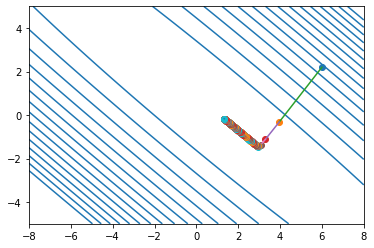

In [7]:
#plotting subplots
fig,ax = plt.subplots()
p0 = np.linspace(-8,8,490)
p1 = np.linspace(-5,5,490)

pa0, pa1 = np.meshgrid(p0,p1)

j = J(pa0,pa1,x/100000,y/100000,m=len(x))
ax.contour(pa0,pa1,J(pa0,pa1,x/100000,y/100000,m=len(x)),colors='C0',levels=[i for i in np.arange(0,80,5)])


a0 = 6
a1 = 2.2
ax.plot(a0,a1,'o')

for i in range(250):
    a0old = a0
    a1old = a1
    #updating the values
    a0,a1 = update(a0,a1,gradient(a0,a1,x/100000,y/100000,m=len(x)),alpha=0.27)
    ax.plot(a0,a1,'o')
    ax.plot([a0old,a0],[a1old,a1],'-')
    
print(a0,a1)


In [8]:
x_mean = x.mean()
x_std = x.std()

y_mean = y.mean()
y_std = y.std()

#mean normalization
x_new = (x - x_mean)/x_std
y_new = (y - y_mean)/y_std

In [9]:
def plot_s(start=[-1,4],alpha=0.5,steps=10):
    fig,ax = plt.subplots()
    p0 = np.linspace(-5,5,100)
    p1 = np.linspace(-2,5,100)

    pa0, pa1 = np.meshgrid(p0,p1)

    #j = J(pa0,pa1,x/100000,y/100000,m=len(x))
    ax.contour(pa0,pa1,J(pa0,pa1,x_new,y_new,m=len(x)),colors='C0',levels=[i for i in np.arange(0,80,0.9)])


    a0 = start[0]
    a1 = start[1]
    ax.plot(a0,a1,'o')

    for i in range(steps):
        a0old = a0
        a1old = a1
        #updating the values
        a0,a1 = update(a0,a1,gradient(a0,a1,x_new,y_new,m=len(x)),alpha=alpha)
        print(a0,a1)
        ax.plot(a0,a1,'o')
        ax.plot([a0old,a0],[a1old,a1],'-')


-0.5000000000000038 2.128351118451674
-0.25000000000000405 1.1738101888620278
-0.12500000000000344 0.6869943147713078
-0.06250000000000251 0.4387182189850406
-0.031250000000001964 0.31209741013404424
-0.01562500000000144 0.2475207976200361
-0.007812500000001141 0.21458672523789188
-0.003906250000000972 0.19779034832299833
-0.001953125000000928 0.18922419609640262
-0.000976562500000817 0.1848554584608388


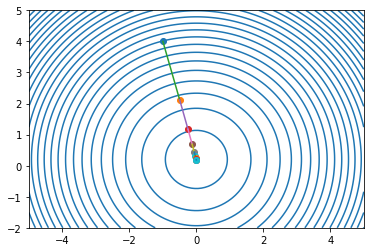

In [10]:
plot_s(start=[-1,4],alpha=0.5,steps=10)

In [11]:
def plot_graph(x,y,a0,a1):
    fig,ax = plt.subplots()
    ax.plot(x,y,'o',label="training data")
    ax.plot(x,hypo(x_new,a0,a1),label="h(x) = %.2f + %.2f * x"%(a0,a1))
    plt.legend()

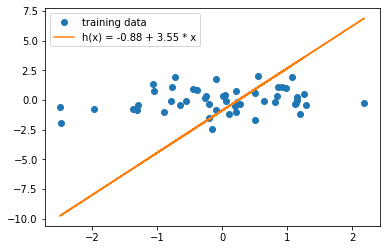

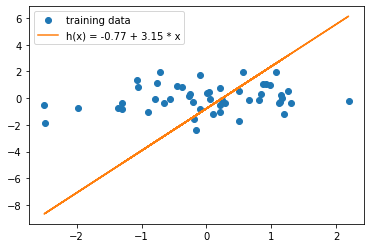

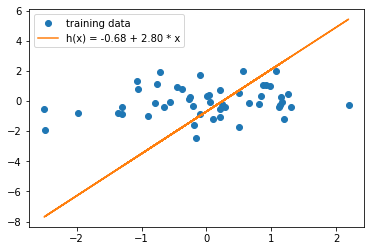

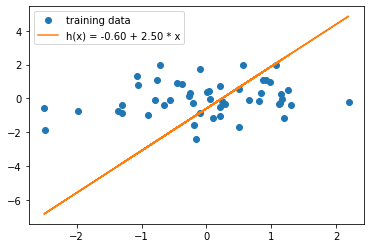

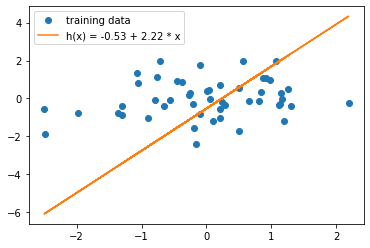

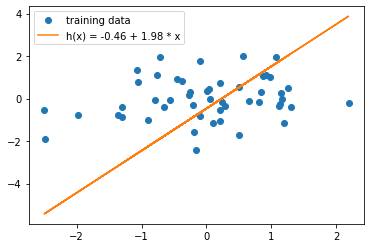

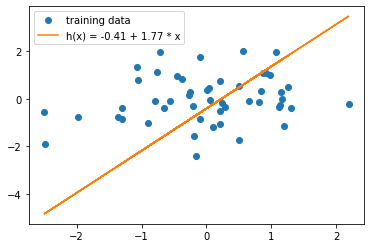

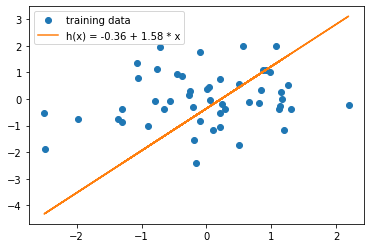

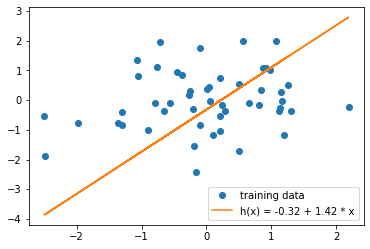

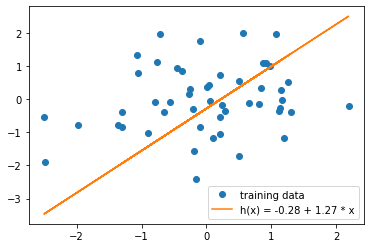

In [12]:
a0 = -1
a1 = 4
for i in range(10):
    gJ = gradient(a0,a1,x_new,y_new,m)
    a0,a1 = update(a0,a1,gJ,alpha=0.12)
    plot_graph(x_new,y_new,a0,a1)

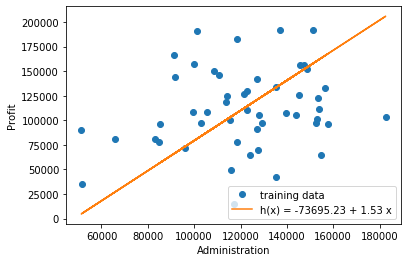

In [13]:
a0 = 0
a1 = 0.94

b1 = y_std/(x_std*a1)
b0 = y_std*a0 - b1*x_mean + y_mean

fig,ax = plt.subplots()

ax.plot(x,y,'o',label="training data")
ax.plot(x,b0+b1*x,label="h(x) = %.2f + %.2f x"%(b0,b1))
ax.set_xlabel('Administration')
ax.set_ylabel('Profit')
plt.legend()

In [14]:
def predict(x,a0,a1):
    pre = y_std*(a0 + a1*(x - x_mean)/x_std) + y_mean
    return pre

In [15]:
predict(471784,0,0.94)

585903.4667607258

In [16]:
predict(362861,0,0.88)

417762.87287541525